<a href="https://colab.research.google.com/github/julianovale/DATA_DataSciencePython/blob/main/0008_SMAA_Topsis_Saw_Mew_Giovani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MCDM - Library

https://openbase.io/python/mcdm

https://scikit-criteria.readthedocs.io/en/latest/tutorial/quickstart.html

In [103]:
! pip install mcdm

In [104]:
import mcdm
import random
import statsmodels.graphics.api as smg

In [105]:
import pandas as pd                 
import matplotlib.pyplot as plt    
import numpy as np
import math
import datetime
%matplotlib inline
#import seaborn as sns
#sns.set(style="whitegrid", color_codes=True)

In [106]:
# Correlationship among features
def plot_corr(df, size=8):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

In [107]:
import scipy.stats as stats

In [108]:
def SMAA(n): # n = number of criterios
  # Método SMAA
  w = [random.random() for x in range(n-1)] # random list
  w = sorted(w) # sorted
  w = [0] + w + [1] # adding 0 and 1

  # Selecting Final Weights
  w_final = []
  for n in range(1,n+2-1):
    w_final.append(w[n]-w[n-1])
  print(w_final)
  return w_final

### Projeto Final

In [109]:
x_matrix = [
[800,1.251,2347.5,1.47,0.078546667],
[240,1.795,2413.7,1.21,0.062546667],
[400,0.804,2164,1.89,0.0456],
[2250,0.33,1953,3.4,0.051747126],
[900,0.729,4199.8,2.04,0.065155556],
[600,0.82,1446.5,1.88,0.031448276],
[400,1.396,1562.6,1.39,0.028950617],
[530,0.468,740.2,2.7,0.015236559],
[500,0.456,604.8,2.81,0.019544444],
[400,0.619,677.3,2.28,0.019544444],
[200,0.763,457.4,1.93,0.011666667],
[150,0.83,370.4,1.83,0.0875],
[750,3.58,3385,0.93,0.781818182],
]

In [110]:
data = pd.DataFrame(x_matrix, columns=['CAPEX', 'IRR', 'NPV', 'Payb.', 'CC RED'])
data

,CAPEX,IRR,NPV,Payb.,CC RED
0,800,1.251,2347.5,1.47,0.078547
1,240,1.795,2413.7,1.21,0.062547
2,400,0.804,2164.0,1.89,0.045600
3,2250,0.330,1953.0,3.40,0.051747
4,900,0.729,4199.8,2.04,0.065156
5,600,0.820,1446.5,1.88,0.031448
6,400,1.396,1562.6,1.39,0.028951
7,530,0.468,740.2,2.70,0.015237
8,500,0.456,604.8,2.81,0.019544
9,400,0.619,677.3,2.28,0.019544


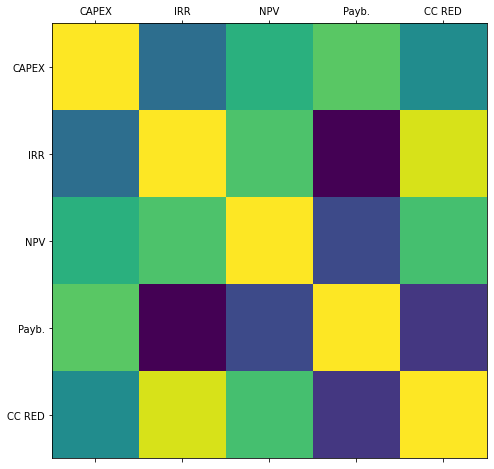

In [111]:
plot_corr(data)

In [112]:
data.corr()

,CAPEX,IRR,NPV,Payb.,CC RED
CAPEX,1.000000,-0.136148,0.351646,0.541355,0.087950
IRR,-0.136148,1.000000,0.501972,-0.780467,0.894572
NPV,0.351646,0.501972,1.000000,-0.380822,0.473260
Payb.,0.541355,-0.780467,-0.380822,1.000000,-0.492961
CC RED,0.087950,0.894572,0.473260,-0.492961,1.000000


In [113]:
x_matrix = data[['CAPEX', 'IRR', 'NPV', 'Payb.', 'CC RED']].values
x_matrix

array([[8.00000000e+02, 1.25100000e+00, 2.34750000e+03, 1.47000000e+00,
        7.85466670e-02],
       [2.40000000e+02, 1.79500000e+00, 2.41370000e+03, 1.21000000e+00,
        6.25466670e-02],
       [4.00000000e+02, 8.04000000e-01, 2.16400000e+03, 1.89000000e+00,
        4.56000000e-02],
       [2.25000000e+03, 3.30000000e-01, 1.95300000e+03, 3.40000000e+00,
        5.17471260e-02],
       [9.00000000e+02, 7.29000000e-01, 4.19980000e+03, 2.04000000e+00,
        6.51555560e-02],
       [6.00000000e+02, 8.20000000e-01, 1.44650000e+03, 1.88000000e+00,
        3.14482760e-02],
       [4.00000000e+02, 1.39600000e+00, 1.56260000e+03, 1.39000000e+00,
        2.89506170e-02],
       [5.30000000e+02, 4.68000000e-01, 7.40200000e+02, 2.70000000e+00,
        1.52365590e-02],
       [5.00000000e+02, 4.56000000e-01, 6.04800000e+02, 2.81000000e+00,
        1.95444440e-02],
       [4.00000000e+02, 6.19000000e-01, 6.77300000e+02, 2.28000000e+00,
        1.95444440e-02],
       [2.00000000e+02, 7.6300

In [114]:
mcdm.normalize(x_matrix, is_benefit_x=[False,False,False,False,False], n_method="Vector")

(array([[0.27333859, 0.25755472, 0.3160108 , 0.19520621, 0.09811136],
        [0.08200158, 0.36955293, 0.32492237, 0.16067994, 0.07812602],
        [0.1366693 , 0.16552677, 0.29130878, 0.25097942, 0.05695822],
        [0.76876479, 0.06794009, 0.26290483, 0.45149736, 0.06463649],
        [0.30750592, 0.15008584, 0.56535981, 0.27089842, 0.08138474],
        [0.20500394, 0.16882084, 0.19472188, 0.24965148, 0.03928153],
        [0.1366693 , 0.28740718, 0.21035079, 0.18458275, 0.03616174],
        [0.18108682, 0.09635141, 0.09964268, 0.35854203, 0.01903174],
        [0.17083662, 0.09388086, 0.08141569, 0.37314929, 0.02441265],
        [0.1366693 , 0.12743914, 0.09117534, 0.30276882, 0.02441265],
        [0.06833465, 0.15708573, 0.06157331, 0.25629115, 0.01457264],
        [0.05125099, 0.17087963, 0.04986173, 0.24301182, 0.10929482],
        [0.25625493, 0.73704707, 0.45567478, 0.12349781, 0.97655635]]),
 [False, False, False, False, False])

In [115]:
alt_names = ["P1","P2","P3","P4","P5","P6","P7","P8","P9","P10","P11","P12","P13"]

In [116]:
mcdm.rank(x_matrix, alt_names=alt_names,w_vector=[0.2, 0.15, 0.2, 0.3, 0.15], n_method="Vector", s_method="TOPSIS")

[('P13', 0.5792076426765468),
 ('P4', 0.4988543584791879),
 ('P5', 0.3919146104053856),
 ('P1', 0.2811718802085088),
 ('P9', 0.2538008720789572),
 ('P8', 0.24776419033236993),
 ('P2', 0.24608845895926224),
 ('P3', 0.2294073409741899),
 ('P6', 0.21010268174341984),
 ('P10', 0.1965369836491544),
 ('P7', 0.1872028475200098),
 ('P12', 0.14576633979426393),
 ('P11', 0.1454011653834225)]

In [117]:
norm = mcdm.normalize(x_matrix, is_benefit_x=[True,True,True,True,True], n_method="Vector")

In [118]:
x_matrix

array([[8.00000000e+02, 1.25100000e+00, 2.34750000e+03, 1.47000000e+00,
        7.85466670e-02],
       [2.40000000e+02, 1.79500000e+00, 2.41370000e+03, 1.21000000e+00,
        6.25466670e-02],
       [4.00000000e+02, 8.04000000e-01, 2.16400000e+03, 1.89000000e+00,
        4.56000000e-02],
       [2.25000000e+03, 3.30000000e-01, 1.95300000e+03, 3.40000000e+00,
        5.17471260e-02],
       [9.00000000e+02, 7.29000000e-01, 4.19980000e+03, 2.04000000e+00,
        6.51555560e-02],
       [6.00000000e+02, 8.20000000e-01, 1.44650000e+03, 1.88000000e+00,
        3.14482760e-02],
       [4.00000000e+02, 1.39600000e+00, 1.56260000e+03, 1.39000000e+00,
        2.89506170e-02],
       [5.30000000e+02, 4.68000000e-01, 7.40200000e+02, 2.70000000e+00,
        1.52365590e-02],
       [5.00000000e+02, 4.56000000e-01, 6.04800000e+02, 2.81000000e+00,
        1.95444440e-02],
       [4.00000000e+02, 6.19000000e-01, 6.77300000e+02, 2.28000000e+00,
        1.95444440e-02],
       [2.00000000e+02, 7.6300

In [119]:
results = mcdm.rank(x_matrix, alt_names=alt_names, w_vector=[0.2, 0.1, 0.25, 0.25, 0.2],n_method="Vector", s_method="TOPSIS")
df1 = pd.DataFrame(results,columns=['TOPSIS','TOPSIS_Score'])
df1

,TOPSIS,TOPSIS_Score
0,P13,0.632936
1,P4,0.454851
2,P5,0.402174
3,P1,0.275354
4,P2,0.236998
5,P3,0.225637
6,P9,0.203305
7,P8,0.199959
8,P6,0.188981
9,P7,0.166848


In [120]:
df2 = pd.DataFrame(mcdm.rank(x_matrix, alt_names=alt_names,w_vector=[0.2, 0.1, 0.25, 0.25, 0.2], n_method="Vector",s_method="SAW"),columns=['SAW','SAW_Score'])
df2

,SAW,SAW_Score
0,P13,0.465060
1,P4,0.352075
2,P5,0.301851
3,P1,0.227850
4,P3,0.190850
5,P2,0.190381
6,P6,0.176833
7,P8,0.164205
8,P9,0.162079
9,P7,0.162040


In [121]:
df3 = pd.DataFrame(mcdm.rank(x_matrix, alt_names=alt_names,w_vector=[0.2, 0.1, 0.25, 0.25, 0.2], n_method="Vector",s_method="MEW"),columns=['MEW','MEW_Score'])
df3

,MEW,MEW_Score
0,P13,0.358098
1,P5,0.247512
2,P4,0.246082
3,P1,0.211018
4,P3,0.164486
5,P2,0.157589
6,P6,0.149837
7,P7,0.135493
8,P8,0.110689
9,P9,0.110140


In [122]:
df4 = pd.DataFrame(mcdm.rank(x_matrix, alt_names=alt_names,w_vector=[0.2, 0.1, 0.25, 0.25, 0.2], n_method="Vector", w_method="SD", s_method="TOPSIS"),columns=['TOPSIS2','TOPSIS2_Score'])
df4

,TOPSIS2,TOPSIS2_Score
0,P13,0.632936
1,P4,0.454851
2,P5,0.402174
3,P1,0.275354
4,P2,0.236998
5,P3,0.225637
6,P9,0.203305
7,P8,0.199959
8,P6,0.188981
9,P7,0.166848


In [123]:
df_all = pd.concat([df1,df2,df3,df4],axis=1)
df_all

,TOPSIS,TOPSIS_Score,SAW,SAW_Score,MEW,MEW_Score,TOPSIS2,TOPSIS2_Score
0,P13,0.632936,P13,0.465060,P13,0.358098,P13,0.632936
1,P4,0.454851,P4,0.352075,P5,0.247512,P4,0.454851
2,P5,0.402174,P5,0.301851,P4,0.246082,P5,0.402174
3,P1,0.275354,P1,0.227850,P1,0.211018,P1,0.275354
4,P2,0.236998,P3,0.190850,P3,0.164486,P2,0.236998
5,P3,0.225637,P2,0.190381,P2,0.157589,P3,0.225637
6,P9,0.203305,P6,0.176833,P6,0.149837,P9,0.203305
7,P8,0.199959,P8,0.164205,P7,0.135493,P8,0.199959
8,P6,0.188981,P9,0.162079,P8,0.110689,P6,0.188981
9,P7,0.166848,P7,0.162040,P9,0.110140,P7,0.166848


In [124]:
df_all.to_excel('Results_2.xlsx')

In [125]:
data = []
for i in range(10000):
    weights = SMAA(5)
    order = mcdm.rank(x_matrix, alt_names=alt_names,w_vector=weights, n_method="Vector", s_method="TOPSIS")
    data.append([x[0] for x in order]+weights)

header = ['1º','2º','3º','4º','5º','6º','7º','8º','9º','10º','11º','12º','13º','w1','w2','w3','w4','w5']
df = pd.DataFrame(data, columns = header)
print(df.shape)
df.head()

A saída de streaming foi truncada nas últimas 5000 linhas.
[0.11959174880472323, 0.09083598805809567, 0.005977241194806471, 0.5349059301624925, 0.24868909177988208]
[0.37537968431965163, 0.028378287521493295, 0.13525520967924087, 0.21886923357422772, 0.24211758490538648]
[0.16591044437293367, 0.0976612539756403, 0.48660009745207256, 0.04044994679123526, 0.20937825740811822]
[0.27765130492042533, 0.1906298882153301, 0.25950414461970683, 0.17235925457309265, 0.09985540767144507]
[0.20155033992093452, 0.16428431488919548, 0.05580170603483414, 0.14207718948719095, 0.4362864496678449]
[0.1702932945491702, 0.14715557695285264, 0.007313112908545305, 0.5955102183772847, 0.07972779721214718]
[0.017979017386952734, 0.26079273637894995, 0.15955930553877662, 0.13306141121020199, 0.4286075294851187]
[0.1170564149676534, 0.37458934146613476, 0.015493168669082458, 0.4591346372356503, 0.03372643766147909]
[0.3555564255812642, 0.11157149332220173, 0.17898342211895124, 0.0614222854735631, 0.292466373504

,1º,2º,3º,4º,5º,6º,7º,8º,9º,10º,11º,12º,13º,w1,w2,w3,w4,w5
0,P4,P13,P5,P1,P6,P8,P9,P10,P3,P7,P2,P12,P11,0.647842,0.023401,0.038670,0.129277,0.160811
1,P4,P5,P1,P13,P6,P8,P9,P3,P10,P7,P2,P11,P12,0.602167,0.013802,0.159929,0.220309,0.003793
2,P13,P4,P5,P2,P1,P7,P3,P6,P8,P9,P12,P10,P11,0.223326,0.314436,0.196793,0.128457,0.136989
3,P13,P2,P7,P1,P5,P4,P3,P6,P9,P12,P8,P11,P10,0.053480,0.400158,0.159962,0.220780,0.165621
4,P4,P13,P5,P1,P6,P3,P8,P2,P9,P7,P10,P12,P11,0.455355,0.093971,0.189386,0.049182,0.212106


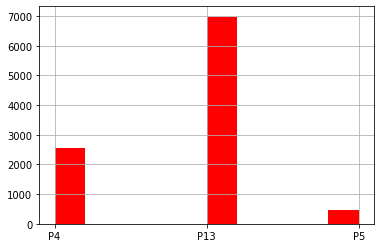

In [126]:
name ='1º'
df[name].hist(bins=10,color='red')

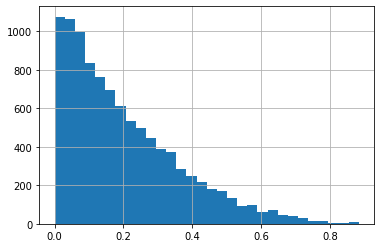

In [127]:
name ='w5'
df[name].hist(bins=30)

In [128]:
df.loc[df['1º']=='P13'].shape

(6976, 18)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a99441940>,
      dtype=object)

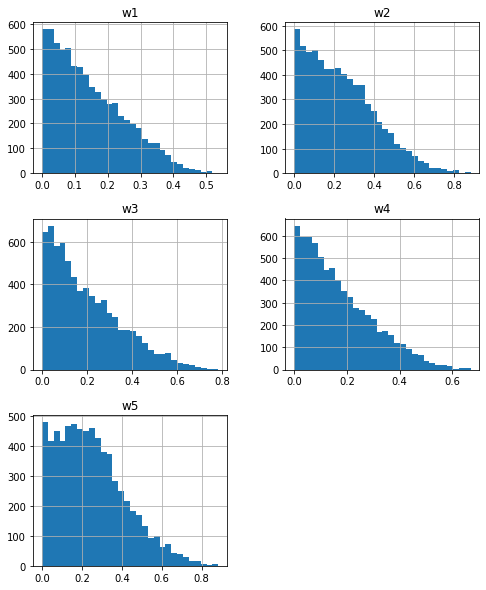

In [129]:
df.loc[df['1º']=='P13'].hist(bins=30,figsize=(8,10))

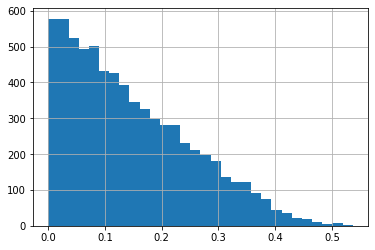

In [130]:
df.loc[df['1º']=='P13']['w1'].hist(bins=30)

In [131]:
df['1º'].unique()

array(['P4', 'P13', 'P5'], dtype=object)

In [132]:
df['2º'].unique()

array(['P13', 'P5', 'P4', 'P2', 'P9', 'P1', 'P12'], dtype=object)

## Exercício Sala

In [133]:
x_matrix = [
[0.989800874, 0.118644068, 1, 0.142857143],
[1, 0.389830508, 0.588235294, 0],
[0.52841185, 1, 0, 1],
[0.504128218, 0.881355932, 0.470588235, 0.428571429],
[0.801845556, 0, 1, 0.428571429],
[0, 0.830508475, 0, 1],
]

In [134]:
mcdm.rank(x_matrix, w_vector=[0.5, 0.1, 0.2, 0.2], s_method="TOPSIS")

[('a1', 0.7349501318535494),
 ('a5', 0.7155677472149482),
 ('a2', 0.6962508345124033),
 ('a3', 0.5281829413248956),
 ('a4', 0.502341533387995),
 ('a6', 0.28670240909330724)]

In [135]:
mcdm.rank(x_matrix, w_vector=[0.5, 0.1, 0.2, 0.2], s_method="SAW")

[('a1', 0.7353362724),
 ('a5', 0.6866370637999999),
 ('a2', 0.6566301096),
 ('a3', 0.564205925),
 ('a4', 0.520031635),
 ('a6', 0.28305084750000004)]

In [136]:
mcdm.rank(x_matrix, w_vector=[0.5, 0.1, 0.2, 0.2], s_method="MEW")

[('a1', 0.5447270117646995),
 ('a4', 0.5090008328074627),
 ('a2', 0.0),
 ('a3', 0.0),
 ('a5', 0.0),
 ('a6', 0.0)]

In [137]:
mcdm.rank(x_matrix, w_vector=[0.5, 0.1, 0.2, 0.2], s_method="mTOPSIS")

[('a1', 0.6375824376803059),
 ('a5', 0.6346824722086423),
 ('a2', 0.5948313871313521),
 ('a3', 0.5430752749847073),
 ('a4', 0.5188716231350883),
 ('a6', 0.38218606632252583)]

In [138]:
mcdm.rank(x_matrix, w_vector=[0.5, 0.1, 0.2, 0.2], n_method="Linear2", w_method="CRITIC", s_method="SAW")

[('a1', 0.7353362724),
 ('a5', 0.6866370637999999),
 ('a2', 0.6566301096),
 ('a3', 0.564205925),
 ('a4', 0.520031635),
 ('a6', 0.28305084750000004)]

## Funcion

In [139]:
def SMAA(n): # n = number of criterios
  # Método SMAA
  w = [random.random() for x in range(n-1)] # random list
  w = sorted(w) # sorted
  w = [0] + w + [1] # adding 0 and 1

  # Selecting Final Weights
  w_final = []
  for n in range(1,n+2-1):
    w_final.append(w[n]-w[n-1])
  print(w_final)
  return w_final

mcdm.rank(x_matrix, w_vector = SMAA(4), s_method="TOPSIS")

In [140]:
data = []
for i in range(10000):
  order = mcdm.rank(x_matrix, w_vector = SMAA(4), s_method="TOPSIS")
  data.append([x[0] for x in order])

df = pd.DataFrame(data, columns = ['Primeiro','Segundo','Terceiro','Quarto','Quinto','Sexto'])
print(df.shape)
df.head()

A saída de streaming foi truncada nas últimas 5000 linhas.
[0.24291656552492846, 0.39921708217704555, 0.10257672697541642, 0.25528962532260957]
[0.23640886692649032, 0.2396630041897223, 0.42415351247220445, 0.09977461641158292]
[0.07316573845841112, 0.2938254231323735, 0.019113673506073292, 0.6138951649031421]
[0.1675126864933787, 0.3413198276787347, 0.0422247798978066, 0.44894270593008]
[0.010246279938772695, 0.19843340479540994, 0.20581279465956093, 0.5855075206062564]
[0.2668809334169785, 0.24693148459843517, 0.290174244950676, 0.19601333703391033]
[0.31325479646311205, 0.29795459881770614, 0.3485701964631618, 0.040220408256020024]
[0.35281954967774787, 0.15887637764590234, 0.44571672317185207, 0.04258734950449772]
[0.14119191136581377, 0.19279051098440747, 0.3115828966871532, 0.35443468096262554]
[0.3025344285454149, 0.2760554552920341, 0.20540053609260533, 0.21600958006994564]
[0.05517688404859622, 0.1366153556768962, 0.597063647859116, 0.21114411241539155]
[0.16089945191787935, 0

,Primeiro,Segundo,Terceiro,Quarto,Quinto,Sexto
0,a5,a1,a2,a4,a3,a6
1,a3,a6,a5,a4,a1,a2
2,a2,a3,a1,a4,a5,a6
3,a1,a2,a5,a4,a3,a6
4,a2,a1,a5,a3,a4,a6


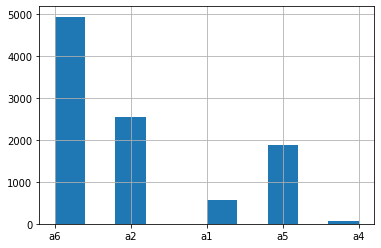

In [141]:
name ='Sexto'
df[name].hist(bins=10)